### Introduction

In this project, we will write functions to process and perform some analysis the data in the file <code>indicators.csv</code> which consists of actual data related to economic well-being indicators on a global scale. The table comprises the following fields:

1. <code>code</code>: the three-character code specific to the country on an international level.
2. <code>year</code>: the year to which the data in the row pertains.
3. <code>country</code>: the name of the country in English, with capitalization and spacing.
4. <code>pop</code>: the country's population, measured in millions of people.
5. <code>gdp</code>: the country's gross domestic product, expressed in billions of US dollars.
6. <code>life</code>: the country's life expectancy, measured in years.
7. <code>cell</code>: the total count of subscribers to cell phone services within the country, expressed in millions.

Essentially, each row in the table represents a specific country's data for a particular year, encompassing various indicators such as population, GDP, life expectancy, and cell phone subscribers.

This project will be divided into four distinct parts to present plots that demonstrate the countries ranking highest based on various indicator metrics. Initially, we build a dictionary to map the country name to its country code. After that, we create two different dictionaries that map country codes to their average life expectancy and GDP per capita, respectively. Then, we will plot two bar graphs based on the three dictionaries we have built above. Subsequently, we will generate plots and carry out analyses of our preference to reveal some
interesting trends in data.

### Part 1: Building Code-to-Country Dictionary

In the first section of the project, we will create a dictionary where the country codes (derived from the <code>code</code> column) serve as the keys, which correspond to the country name (specified in the <code>country</code> column). To achieve this, we will use the <code>codeToCountryDictionary(indicatorsFile)</code> function, which builds a dictionary of country codes to country names. To implement this, we first read the first line of the file to get the header row and count the number of columns. Then, we will use a <code>for</code> loop to loop through the remaining lines in the file and check if the line has the expected number of columns. If so, we extract the country code and country name from the row and add the country code to country name mapping to the dictionary. 

Additionally, it is noteworthy that due to the presence of commas in some country names (e.g., "Macedonia, FYR"), the standard method of splitting lines based on commas can be disrupted. As a result, in order to avoid this issue and keep the code simple, it is recommended to exclude any countries whose names contain commas from the dictionary. In other words, there is no need to include these countries in the dictionary.

In [1]:
def codeToCountryDictionary(indicatorsFile):
    '''
    Creates a dictionary that maps country codes to their corresponding country names
    Parameter: file object indicatorsFile
    Return value: a dictionary mapping country codes (keys) to their country names (values)
    '''
    indicatorsFile.seek(0)                 # reset file pointer
    header = indicatorsFile.readline()     # skip the first header line 
    numCols = len(header.split(","))       
    countryDict = {}
    
    # loop through each line in the input file
    for line in indicatorsFile:
        splitLine = line.split(",")        # split based on commas in file
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            country = str(splitLine[2])
            countryDict[code] = country    # add an entry to the dictionary
            
    return countryDict

def main():
    filename = "indicators.csv"
    file = open(filename, "r", encoding="utf-8")
    
    answer = codeToCountryDictionary(file)
    print(answer)

    file.close()
main() 

{'ABW': 'Aruba', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'AND': 'Andorra', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ASM': 'American Samoa', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh', 'BGR': 'Bulgaria', 'BHR': 'Bahrain', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BMU': 'Bermuda', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'BRB': 'Barbados', 'BRN': 'Brunei Darussalam', 'BTN': 'Bhutan', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHI': 'Channel Islands', 'CHL': 'Chile', 'CHN': 'China', 'CIV': "Cote d'Ivoire", 'CMR': 'Cameroon', 'COL': 'Colombia', 'COM': 'Comoros', 'CPV': 'Cabo Verde', 'CRI': 'Costa Rica', 'CUB': 'Cuba', 'CUW': 'Curacao', 'CYM': 'Cayman Islands', 'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DJI': 'Djibouti

### Part 2: Building Dictionaries for Average Life Expectancy and GDP per Capita

In the second part of this project, we are tasked with creating dictionaries that map country codes with the average life expectancy and GDP per capita. To achieve the first goal, we will use the <code>codeToAverageLifeExpectancy(indicatorsFile)</code> function, which takes in the file object <code>indicatorsFile</code> and builds a dictionary mapping country codes to average life expectancy. To implement this, we first read the first line of the file to get the header row and count the number of columns. Then, we will use a <code>for</code> loop to loop through the remaining lines in the file and check if the line has the expected number of columns. If so, we extract the country code and life expectancy from the row. Moreover, in terms of the <code>lifeExpectancy</code> variable, we check if it is not an empty string, we will change it to type <code>float</code>. After that, we increase the value in dictionaries <code>lifeExpectancyDict</code> and <code>countExpectancyDict</code>. Furthermore, we loop through all values in <code>lifeExpectancyDict</code> to calculate the average life expectancy by dividing the total life expectancy of each country by its years from the data. 

Similarly, to write the function <code>codeToAverageGdpPerPop(indicatorsFile)</code>, we do the same things as above. However, we will use data from <code>gdp</code> and <code>pop</code>. To calculate the GDP per capita for each year of one country, we will take the value in <code>gdp</code> and then divide it by the country's population <code>pop</code>. After that, we increase the value in dictionaries <code>gdpDict</code> and <code>countDict</code>. After updating the dictionaries, the function calculates the average GDP per capita for each country by dividing the total GDP per capita for all years in the data by the number of years, and rounds the result to two decimal places. 

In [2]:
def codeToAverageLifeExpectancy(indicatorsFile):
    '''    
    Returns the average life expectancy for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average life expectancies
    '''
    indicatorsFile.seek(0)               # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    lifeExpectancyDict = {}
    countExpectancyDict = {}
    
    # loop through the file line by line and update the dictionaries 
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            lifeExpectancy = splitLine[5].strip()
            if lifeExpectancy != "":
                lifeExpectancy = float(lifeExpectancy)
                if code not in lifeExpectancyDict:
                    lifeExpectancyDict[code] = 0
                    countExpectancyDict[code] = 0
                lifeExpectancyDict[code] += lifeExpectancy
                countExpectancyDict[code] += 1

                
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in lifeExpectancyDict:
        averageDict[code] = round(lifeExpectancyDict[code]/countExpectancyDict[code],2)

    return averageDict


def main():
    filename = "indicators.csv"
    file = open(filename, "r", encoding="utf-8")

    answer = codeToAverageLifeExpectancy(file)
    print(answer)

    file.close()


main()

def codeToAverageGdpPerPop(indicatorsFile):
    '''    
    Returns the average GDP per capita for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average GDP per capita
    '''
    indicatorsFile.seek(0)                   # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    gdpDict = {}
    countDict = {}
    
    # loop through the file line by line and update the dictionaries
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:        # check if it's a valid line
            code = str(splitLine[0])
            gdp = splitLine[4].strip()
            pop = splitLine[3].strip()
            if gdp != "" and pop != "":
                gdp = float(gdp)
                pop = float(pop)
                if code not in gdpDict:
                    gdpDict[code] = 0
                    countDict[code] = 0
                gdpDict[code] += gdp/pop 
                countDict[code] += 1
    
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in gdpDict:
        averageDict[code] = round(gdpDict[code]/countDict[code],2)

    return averageDict

def main1():
    filename = "indicators.csv"
    file = open(filename, "r", encoding="utf-8")

    answer = codeToAverageGdpPerPop(file)
    print(answer)

    file.close()


main1()

{'ABW': 72.21, 'AFG': 47.88, 'AGO': 44.29, 'ALB': 71.34, 'ARE': 68.91, 'ARG': 70.93, 'ARM': 70.45, 'ATG': 70.37, 'AUS': 76.29, 'AUT': 74.96, 'AZE': 65.69, 'BDI': 48.65, 'BEL': 75.29, 'BEN': 50.52, 'BFA': 47.49, 'BGD': 58.18, 'BGR': 71.71, 'BHR': 69.68, 'BIH': 70.73, 'BLR': 69.95, 'BLZ': 68.15, 'BMU': 77.96, 'BOL': 54.7, 'BRA': 65.26, 'BRB': 70.07, 'BRN': 71.66, 'BTN': 52.01, 'BWA': 56.98, 'CAF': 45.55, 'CAN': 76.66, 'CHE': 77.24, 'CHI': 75.39, 'CHL': 70.9, 'CHN': 66.28, 'CIV': 47.9, 'CMR': 50.37, 'COL': 67.01, 'COM': 53.86, 'CPV': 63.15, 'CRI': 73.04, 'CUB': 73.95, 'CUW': 76.39, 'CYM': 82.19, 'CYP': 75.8, 'CZE': 72.84, 'DEU': 74.9, 'DJI': 54.54, 'DMA': 73.98, 'DNK': 75.48, 'DOM': 65.41, 'DZA': 62.72, 'ECU': 66.53, 'ERI': 50.62, 'ESP': 76.45, 'EST': 70.72, 'ETH': 48.95, 'FIN': 74.83, 'FJI': 64.36, 'FRA': 76.14, 'FRO': 78.45, 'GAB': 55.64, 'GBR': 75.61, 'GEO': 69.89, 'GHA': 54.63, 'GIN': 46.39, 'GNB': 47.95, 'GNQ': 47.29, 'GRC': 75.43, 'GRD': 67.8, 'GRL': 66.58, 'GTM': 61.15, 'GUM': 71.2

### Part 3: Graphing Top 50 Countries for Highest Life Expectancy and GDP per Capita Averages

In this section, we will write functions to plot two bar graphs that show the top 50 countries for life expectancy and GDP per capita, respectively. We will use the module <code>project4.py</code> that consists of two fucntions <code>rankedKeys()</code> and <code>plotBarGraph</code>. To implement this, the function <code>generate_lists(numDict, title, indicatorsFile)</code> is written, which takes three parameters <code>numDict, title, indicatorsFile</code>. Inside the <code>generate_lists</code> function, the <code>project4.rankedKeys</code> function is called with the <code>numDict</code> dictionary as an argument. This function returns a list of country codes sorted by their corresponding values in the <code>numDict</code> dictionary. The sorted list of codes is stored in the <code>ranked_codes</code> variable. Next, the code loops through each <code>code</code> in <code>ranked_codes</code>, retrieves the country name associated with that <code>code</code> from the dictionary in <code>indicatorsFile</code>, and appends it to the <code>x_labels</code> list. Similarly, the code then loops through each <code>code</code> in <code>ranked_codes</code>, retrieves the numerical value associated with that code from the <code>numDict</code> dictionary, and appends it to the <code>y_values</code> list. Finally, the <code>project4.plotBarGraph</code> function is called with the first 50 elements of <code>x_labels</code> and <code>y_values</code>.

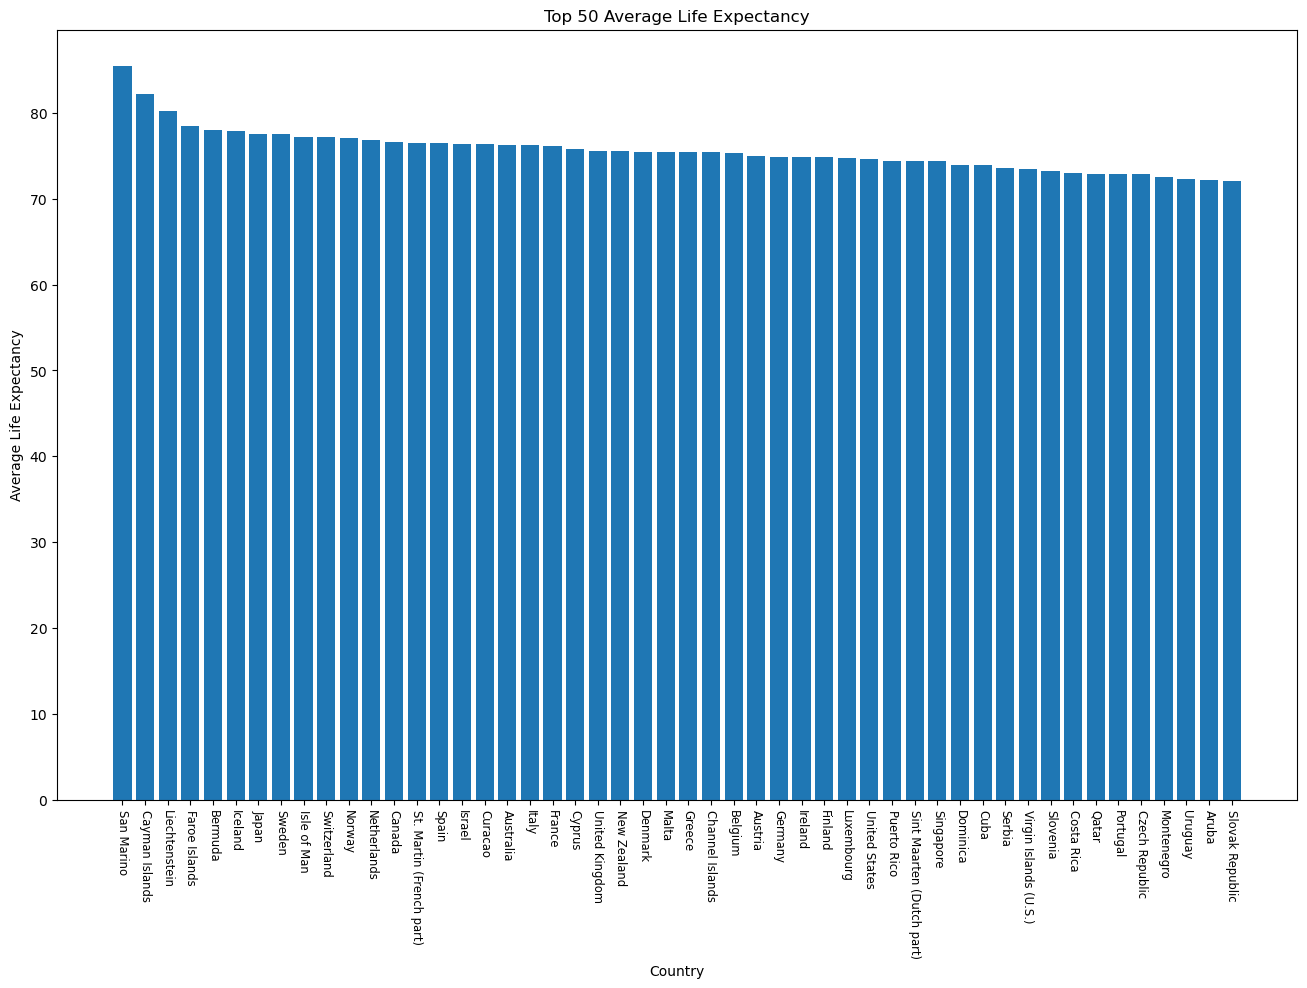

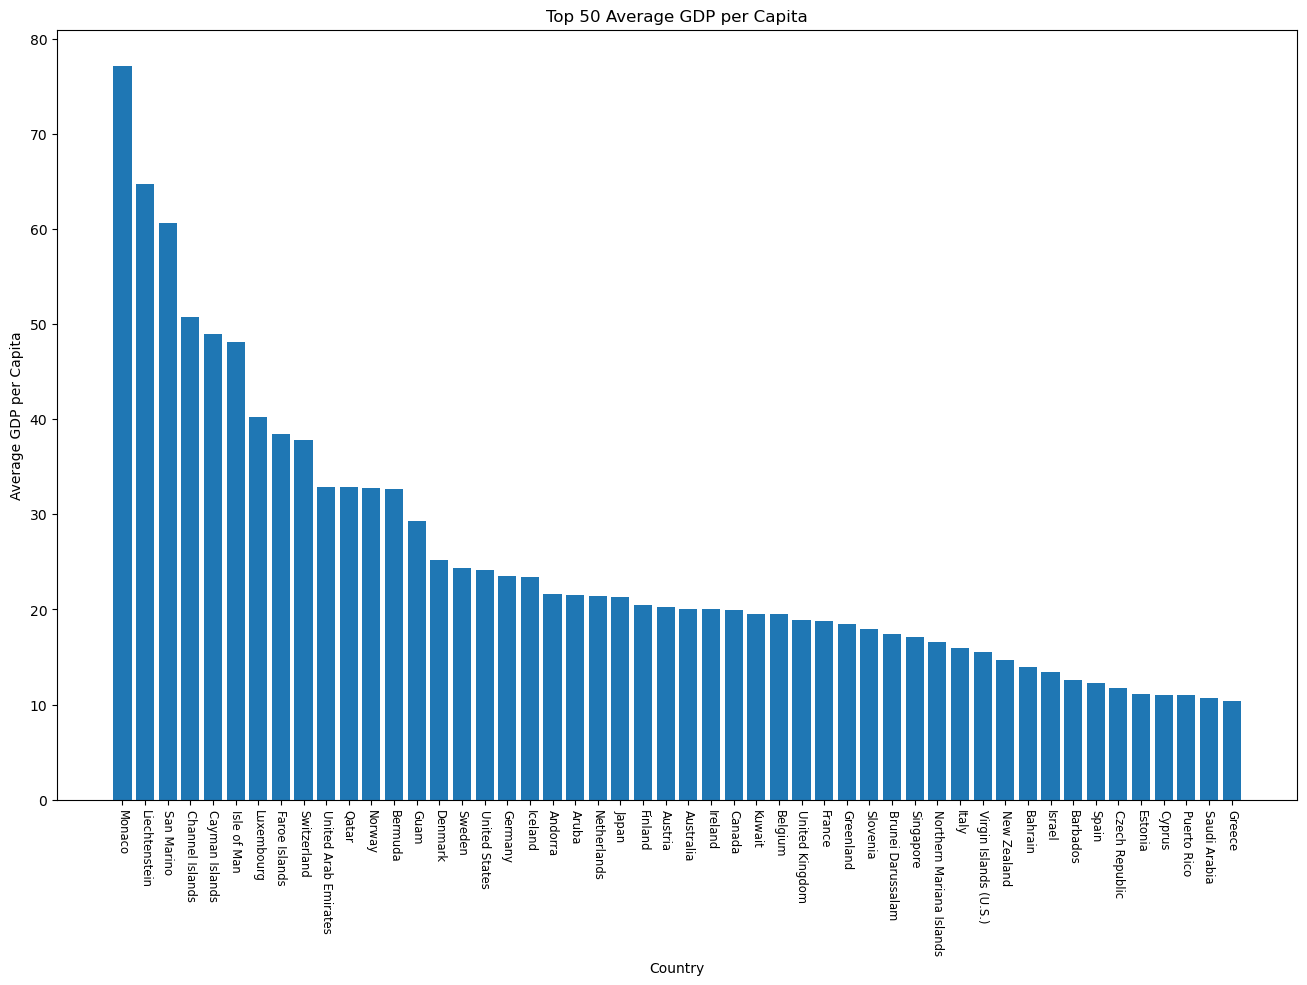

In [4]:
def codeToCountryDictionary(indicatorsFile):
    '''
    Creates a dictionary that maps country codes to their corresponding country names
    Parameter: file object indicatorsFile
    Return value: a dictionary mapping country codes (keys) to their country names (values)
    '''
    indicatorsFile.seek(0)         # reset file pointer
    header = indicatorsFile.readline()     # skip the first header line 
    numCols = len(header.split(","))       
    countryDict = {}
    
    # loop through each line in the input file
    for line in indicatorsFile:
        splitLine = line.split(",")        # split based on commas in file
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            country = str(splitLine[2])
            countryDict[code] = country    # add an entry to the dictionary
            
    return countryDict

def codeToAverageLifeExpectancy(indicatorsFile):
    '''    
    Returns the average life expectancy for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average life expectancies
    '''
    indicatorsFile.seek(0)               # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    lifeExpectancyDict = {}
    countExpectancyDict = {}
    
    # loop through the file line by line and update the dictionaries 
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            lifeExpectancy = splitLine[5].strip()
            if lifeExpectancy != "":
                lifeExpectancy = float(lifeExpectancy)
                if code not in lifeExpectancyDict:
                    lifeExpectancyDict[code] = 0
                    countExpectancyDict[code] = 0
                lifeExpectancyDict[code] += lifeExpectancy
                countExpectancyDict[code] += 1

                
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in lifeExpectancyDict:
        averageDict[code] = round(lifeExpectancyDict[code]/countExpectancyDict[code],2)

    return averageDict

def codeToAverageGdpPerPop(indicatorsFile):
    '''    
    Returns the average GDP per capita for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average GDP per capita
    '''
    indicatorsFile.seek(0)                   # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    gdpDict = {}
    countDict = {}
    
    # loop through the file line by line and update the dictionaries
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:        # check if it's a valid line
            code = str(splitLine[0])
            gdp = splitLine[4].strip()
            pop = splitLine[3].strip()
            if gdp != "" and pop != "":
                gdp = float(gdp)
                pop = float(pop)
                if code not in gdpDict:
                    gdpDict[code] = 0
                    countDict[code] = 0
                gdpDict[code] += gdp/pop 
                countDict[code] += 1
    
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in gdpDict:
        averageDict[code] = round(gdpDict[code]/countDict[code],2)

    return averageDict

import project4

def generate_lists(numDict, title, indicatorsFile):
    '''
    Generates a plot for the given numDict with the top 50 countries based on their corresponding values
    Parameters: dictionary numDict, string title, file object indicatorsFile
    Return value: None. Generates a plot that graphs top 50 countries based on their corresponding values
    '''
    ranked_codes = project4.rankedKeys(numDict)  # call the function rankedKeys from module project4 
    
    x_labels = []
    # iterate through the ranked_codes list
    for code in ranked_codes:
        name = codeToCountryDictionary(indicatorsFile)[code]  # get the corresponding country name for each code 
        x_labels.append(name)
    
    y_values = []
    
    # iterate through the ranked_codes list
    for code in ranked_codes:
        value = numDict[code]  # get the corresponding value for each country code 
        y_values.append(value)
        
    # plot the results
    project4.plotBarGraph(x_labels[:50], y_values[:50], "Top 50 " + title, "Country", title)
    

def main():
    filename = "indicators.csv"
    file = open(filename, "r", encoding="utf-8")

    life_expectancy_dict = codeToAverageLifeExpectancy(file)
    generate_lists(life_expectancy_dict, "Average Life Expectancy", file)

    file.seek(0)

    gdp_dict = codeToAverageGdpPerPop(file)
    generate_lists(gdp_dict, "Average GDP per Capita", file)

    file.close()


main()


### Part 4: Your Turn!

Economic and social indicators such as Gross Domestic Product (GDP) and Life Expectancy are essential measures used to evaluate the well-being of a nation. GDP is a crucial indicator of a country's economic performance, while life expectancy represents the average number of years a person is expected to live in a particular country. Hence, in this part of the project, I would like to investigate the relationship between these two indicators to understand the economic and social determinants of a country's health outcomes.

Similar to the codes in Part 3, I write the <code>gdpAndlife(indicatorsFile)</code> function to consider the relationship between GDP and average life expectancy of each country. The <code>project4.rankedKeys</code> function is called twice with two different functions <code>codeToAverageLifeExpectancy</code> and <code>codeToAverageGdpPerPop</code> as arguments, which return dictionaries containing average life expectancy and average GDP per capita for each country code, respectively. The <code>rankedKeys</code> function returns a list of country codes sorted by their corresponding values in the dictionary. The sorted list of codes is stored in the <code>ranked_codes</code> variable for both life expectancy and GDP per capita. The code then loops through each <code>code</code> in <code>ranked_codes</code>, retrieves the average life expectancy associated with that code from the <code>codeToAverageLifeExpectancy</code> dictionary, and appends it to the <code>x_labels</code> list. After that, the code loops through each <code>code</code> in <code>ranked_codes_gdp</code>, retrieves the average GDP per capita associated with that code from the <code>codeToAverageGdpPerPop</code> dictionary, and appends it to the <code>y_values</code> list. The <code>pyplot.plot</code> function is called to create a line plot of the <code>x_labels</code> and <code>y_values</code> lists, representing the relationship between average life expectancy and average GDP per capita for the top 100 countries.

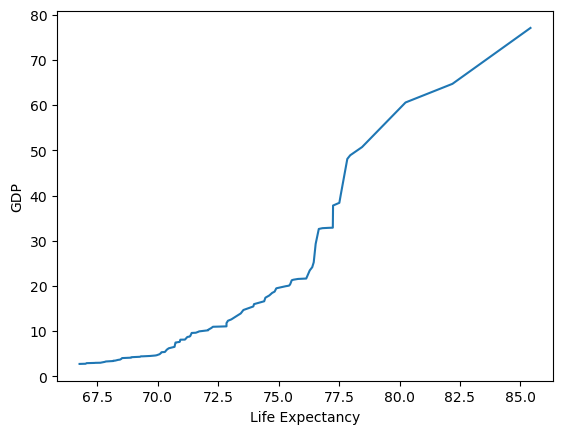

In [9]:
def codeToCountryDictionary(indicatorsFile):
    '''
    Creates a dictionary that maps country codes to their corresponding country names
    Parameter: file object indicatorsFile
    Return value: a dictionary mapping country codes (keys) to their country names (values)
    '''
    indicatorsFile.seek(0)         # reset file pointer
    header = indicatorsFile.readline()     # skip the first header line 
    numCols = len(header.split(","))       
    countryDict = {}
    
    # loop through each line in the input file
    for line in indicatorsFile:
        splitLine = line.split(",")        # split based on commas in file
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            country = str(splitLine[2])
            countryDict[code] = country    # add an entry to the dictionary
            
    return countryDict

def codeToAverageLifeExpectancy(indicatorsFile):
    '''    
    Returns the average life expectancy for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average life expectancies
    '''
    indicatorsFile.seek(0)               # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    lifeExpectancyDict = {}
    countExpectancyDict = {}
    
    # loop through the file line by line and update the dictionaries 
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:      # check if it's a valid line
            code = str(splitLine[0])
            lifeExpectancy = splitLine[5].strip()
            if lifeExpectancy != "":
                lifeExpectancy = float(lifeExpectancy)
                if code not in lifeExpectancyDict:
                    lifeExpectancyDict[code] = 0
                    countExpectancyDict[code] = 0
                lifeExpectancyDict[code] += lifeExpectancy
                countExpectancyDict[code] += 1

                
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in lifeExpectancyDict:
        averageDict[code] = round(lifeExpectancyDict[code]/countExpectancyDict[code],2)

    return averageDict

def codeToAverageGdpPerPop(indicatorsFile):
    '''    
    Returns the average GDP per capita for each country based on the data in the given file
    Parameters: file object indicatorsFile
    Return value: a dictionary where the keys are the country codes and the values are the corresponding
    average GDP per capita
    '''
    indicatorsFile.seek(0)                   # reset file pointer
    header = indicatorsFile.readline()       # skip the first header line 
    numCols = len(header.split(","))
    gdpDict = {}
    countDict = {}
    
    # loop through the file line by line and update the dictionaries
    for line in indicatorsFile:
        splitLine = line.split(",")
        if len(splitLine) == numCols:        # check if it's a valid line
            code = str(splitLine[0])
            gdp = splitLine[4].strip()
            pop = splitLine[3].strip()
            if gdp != "" and pop != "":
                gdp = float(gdp)
                pop = float(pop)
                if code not in gdpDict:
                    gdpDict[code] = 0
                    countDict[code] = 0
                gdpDict[code] += gdp/pop 
                countDict[code] += 1
    
    # calculate the average life expectancy for each country
    averageDict = {}
    for code in gdpDict:
        averageDict[code] = round(gdpDict[code]/countDict[code],2)

    return averageDict

import project4
import matplotlib.pyplot as pyplot

def gdpAndlife(indicatorsFile):
    '''
    Plots a graph showing the relationship between average life expectancy and average GDP per capita 
    Parameter: file object indicatorsFile
    Return value: None. Plots a graph illustrating the relationship between life expectancy and average GDP per capita
    '''
    ranked_codes = project4.rankedKeys(codeToAverageLifeExpectancy(indicatorsFile)) 
    x_labels = []
    
    # iterate through the ranked_codes list
    for code in ranked_codes:
        life_expectancy_dict = codeToAverageLifeExpectancy(indicatorsFile)[code] 
        x_labels.append(life_expectancy_dict)
    
    ranked_codes_gdp = project4.rankedKeys(codeToAverageGdpPerPop(indicatorsFile))
    
    y_values = []
    
    # iterate through the ranked_codes1 list
    for code in ranked_codes_gdp:
        gdp_dict = codeToAverageGdpPerPop(indicatorsFile)[code]
        y_values.append(gdp_dict)
    
    # plot the results
    pyplot.plot(x_labels[:100], y_values[:100])   
    pyplot.xlabel("Life Expectancy")
    pyplot.ylabel("GDP")
    pyplot.show()

def main():
    filename = "indicators.csv"
    file = open(filename, "r", encoding="utf-8")

    file.seek(0)
    gdpAndlife(file)
    file.close()


main()


As shown above, the plot suggests a positive correlation between GDP and average life expectancy, it means that higher GDP is associated with higher life expectancy for each country analyzed.

This result could indicate that economic growth can have positive effects on health outcomes, such as increased access to healthcare, better nutrition, and improved living conditions.

Firstly, higher GDP may lead to increased investment in healthcare infrastructure and services, which makes healthcare more accessible to citizens. As a result, this could lead to better health outcomes and increased life expectancy. Secondly, higher GDP could lead to increased food production, better distribution systems, and increased access to food, resulting in improved nutrition and better health outcomes. Moreover, higher GDP could lead to improved living conditions, such as access to clean water and sanitation, improved housing, and better environmental conditions. This could reduce the incidence of diseases and improve health outcomes.

However, it is important to note that correlation does not necessarily imply causation, and there may be other factors that affect both GDP and life expectancy, such as education, social policies, and environmental factors. Therefore, further research is needed to establish causality and to identify the specific mechanisms through which economic growth and health outcomes are related.